In [ ]:
#In Hospital Mortality Prediction
#Sylvia Chopde
#Importing all important libraries required for our project
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
import sklearn.metrics  as metrics
sklearn.set_config(print_changed_only=True)

In [ ]:
#Reading the CSV File
df = pd.read_csv('Inhospital.csv')

In [ ]:
#Checking dimension of our data
df.shape

(1177, 51)

In [ ]:
#Checking the dataset
df.describe

<bound method NDFrame.describe of       group      ID  outcome  age  ...  Bicarbonate  Lactic acid  PCO2  EF
0         1  125047        0   72  ...    21.166667          0.5  40.0  55
1         1  139812        0   75  ...    33.444444          0.5  78.0  55
2         1  109787        0   83  ...    30.571429          0.5  71.5  35
3         1  130587        0   43  ...    38.571429          0.6  75.0  55
4         1  138290        0   75  ...    22.000000          0.6  50.0  55
...     ...     ...      ...  ...  ...          ...          ...   ...  ..
1172      2  171130        0   62  ...    27.714286          NaN   NaN  40
1173      2  101659        0   78  ...    20.480000          NaN   NaN  30
1174      2  162069        0   85  ...    28.857143          NaN   NaN  55
1175      2  120967        0   79  ...    24.375000          NaN   NaN  25
1176      2  107636        0   47  ...    26.571429          NaN   NaN  55

[1177 rows x 51 columns]>

In [ ]:
X = df.drop(columns='outcome')
y = df[['outcome']]

In [ ]:
X.shape

(1177, 50)

In [ ]:
y.shape

(1177, 1)

In [ ]:
#Checking for missing or null value in our dataset
df.isnull().sum()

group                         0
ID                            0
outcome                       0
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
#Use SimpleImputer to replace missing or null value with Mean of the column
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
col = X.select_dtypes(include='float64').columns
col

Index(['BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2'],
      dtype='object')

In [ ]:
si.fit(X[col])

SimpleImputer()

In [ ]:
#Confirming if all Null and missing  values are removed
X[col] = si.transform(X[col])
X.info()

In [ ]:
df = X.copy()

df['outcome'] = y

In [ ]:
predictors = df.columns

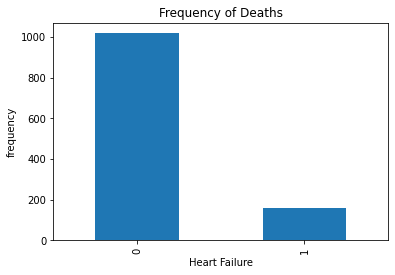

In [ ]:
df['outcome'].value_counts().plot(kind='bar', title='Frequency of Deaths', xlabel='Heart Failure', ylabel='frequency')

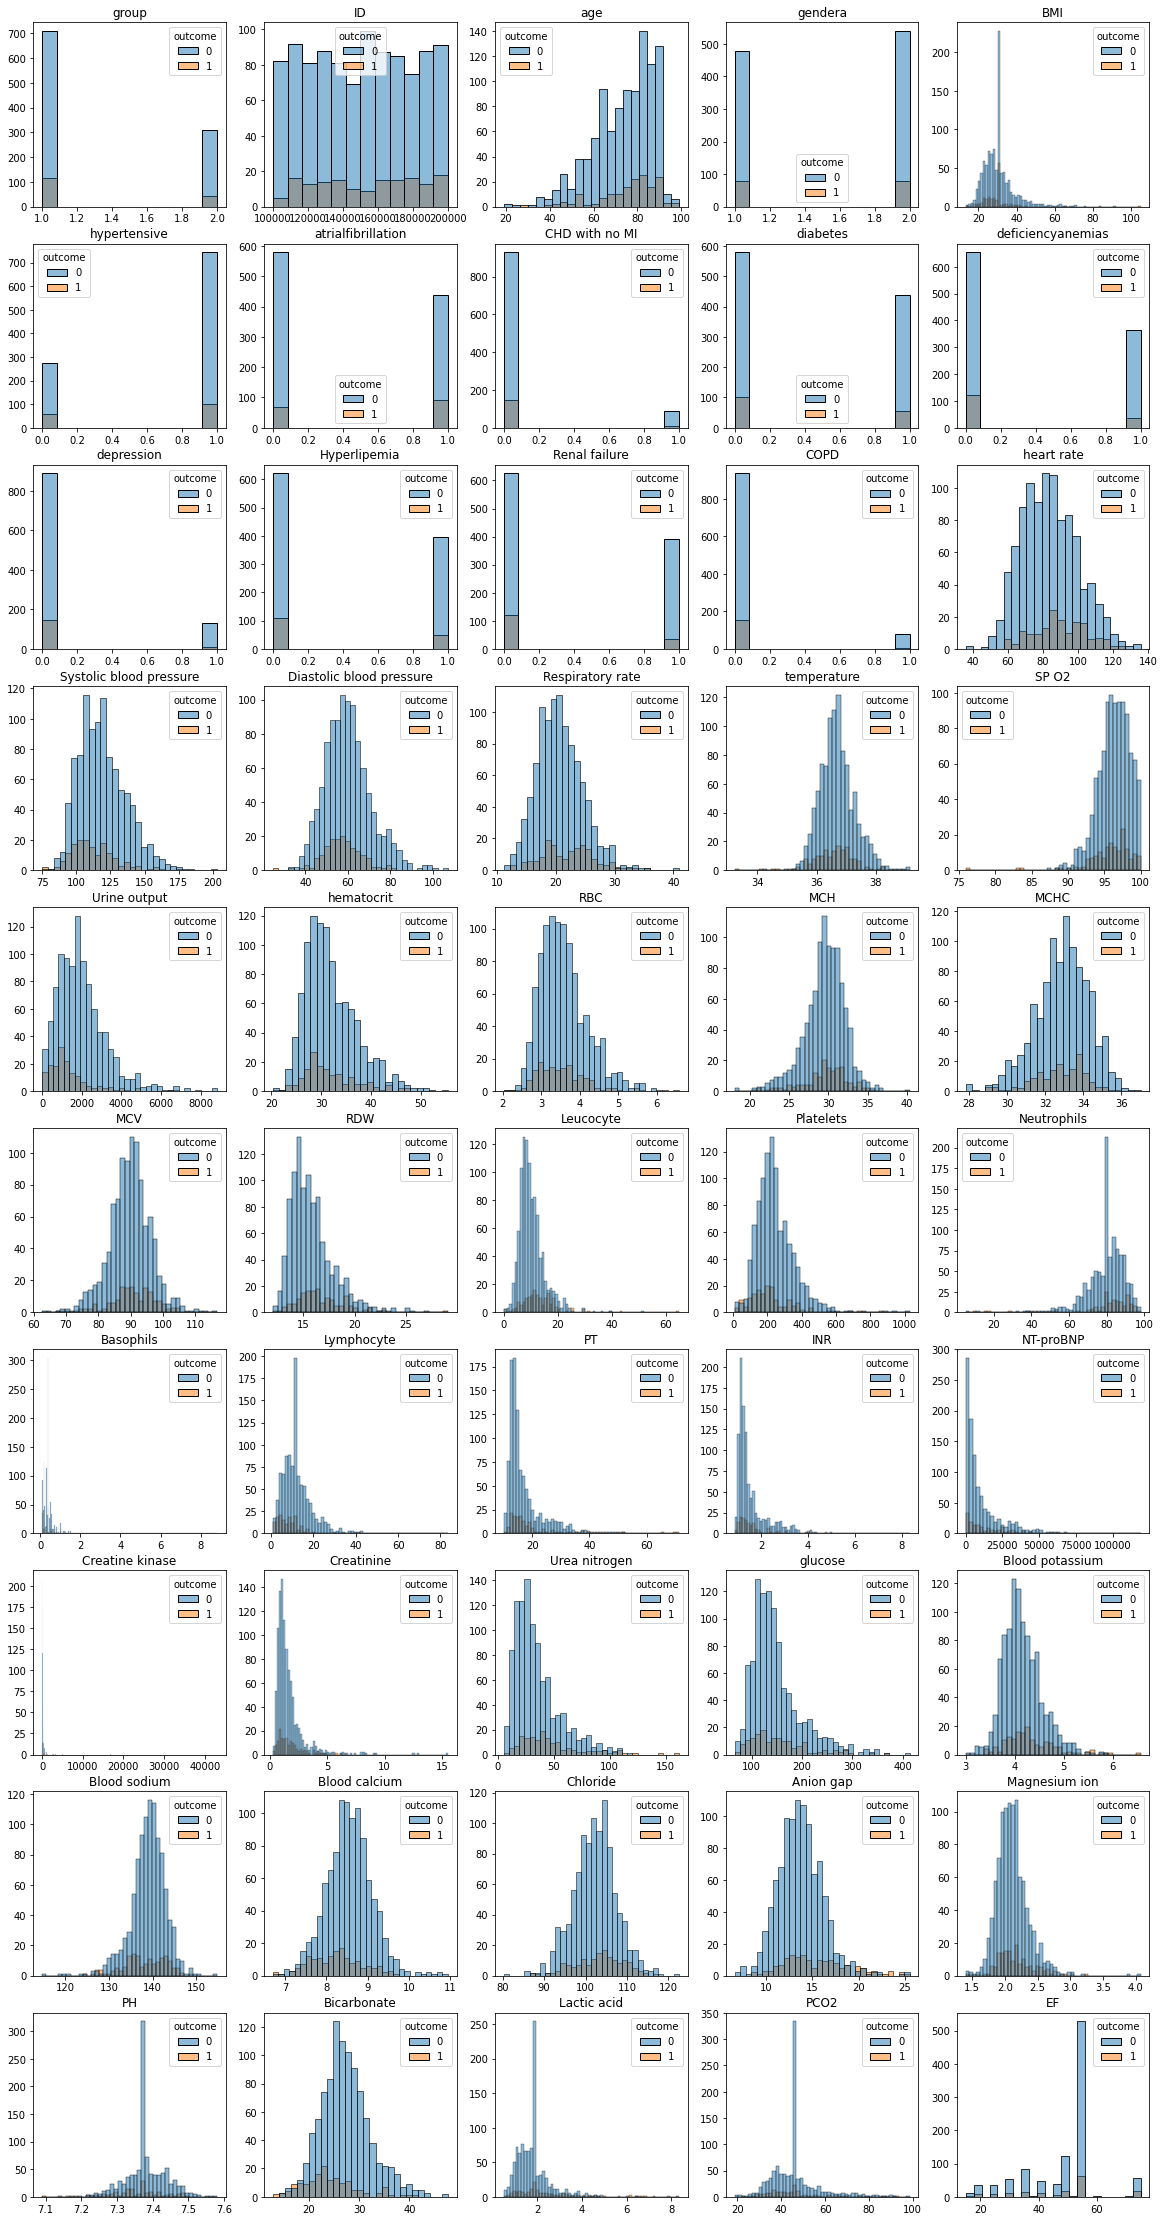

In [ ]:
#Relation of each feature with the outcome
import seaborn as sns

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20,40))
axes = axes.flatten()

for idx, axis in enumerate(axes):
    sns.histplot(data=df, x=df[predictors].iloc[:, idx],
                 ax=axis, hue='outcome', legend=True)
    axis.set_ylabel('')    
    axis.set_xlabel('')
    axis.set_title(predictors[idx])

In [ ]:
#Scaling the data to bring the data set value in a range
from sklearn.preprocessing import StandardScaler
features = ['age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']

X = df.loc[:, features].values
y = df.loc[:, ['outcome']].values

X= StandardScaler().fit_transform(X)
X


array([[-1.53051175e-01, -1.05144929e+00,  8.78126737e-01, ...,
        -1.53367151e+00, -5.03051659e-01,  4.88582562e-01],
       [ 7.03567204e-02,  9.51068212e-01,  8.43182238e-16, ...,
        -1.53367151e+00,  2.95036164e+00,  4.88582562e-01],
       [ 6.66111108e-01,  9.51068212e-01, -4.29058877e-01, ...,
        -1.53367151e+00,  2.35964621e+00, -1.06626853e+00],
       ...,
       [ 8.15049705e-01,  9.51068212e-01, -7.47188765e-01, ...,
        -2.51615968e-16, -6.45736246e-16,  4.88582562e-01],
       [ 3.68233914e-01,  9.51068212e-01,  6.05236226e-01, ...,
        -2.51615968e-16, -6.45736246e-16, -1.84369407e+00],
       [-2.01478364e+00, -1.05144929e+00, -8.38609530e-01, ...,
        -2.51615968e-16, -6.45736246e-16,  4.88582562e-01]])

In [ ]:
#Performing Principle Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
principalComponents = pca.fit(X)
reduced = pca.transform(X)

In [ ]:
#Checking Variance ratio
pca.explained_variance_ratio_

array([0.08830989, 0.06721636, 0.05912792, 0.05329431, 0.04892963,
       0.04602298, 0.04006869, 0.03658908, 0.03391873, 0.03050901,
       0.02824603, 0.02737356, 0.02596515, 0.02402342, 0.02231771,
       0.02106905, 0.02022316, 0.0199599 , 0.01918811, 0.01859139,
       0.01831848, 0.01786723, 0.01695723, 0.01608683, 0.01573639,
       0.01508186, 0.01437699, 0.0142098 , 0.01338551, 0.0129462 ,
       0.01205193, 0.01174581, 0.0111773 , 0.01080124, 0.01046407,
       0.01010764])

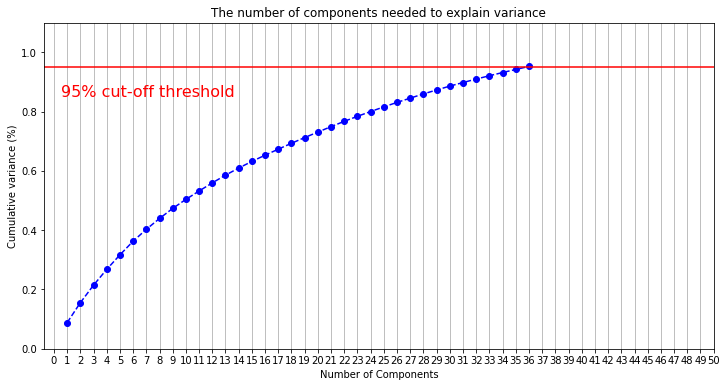

In [ ]:
#Plot to see 95% threshold and 36 Principal Components
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 37, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 51, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
#Naming all components and converting to Dataframe
principalDf = pd.DataFrame(data = reduced, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36'])
principalDf


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,-1.260818,-0.485669,-3.325406,-0.238478,1.359856,-1.099748,0.552645,-1.529641,0.707283,-0.540545,-0.393627,0.955293,-0.216392,-0.160608,-2.262250,1.500197,-0.432989,0.031286,-1.688256,0.534803,0.040327,-0.883612,2.513644,0.075094,-0.862392,1.222642,-0.700565,-0.973465,-0.400105,-0.842577,0.380724,0.235045,-1.174300,-1.540294,0.216495,0.184691
1,2.426649,-0.382961,-1.305080,-1.905398,0.142353,0.140150,4.480825,-0.120617,-0.567277,0.046319,0.871165,-0.591779,-1.302798,-1.618065,-1.325237,0.992334,1.241088,1.198364,0.293832,-0.574453,-0.456202,-0.986048,0.240564,-0.501325,1.174609,1.109076,0.973863,-0.076719,-0.753193,0.193734,-0.345022,-0.297207,-0.822981,0.232641,0.168637,-0.161019
2,-0.120617,-0.953992,-4.439008,-0.582433,0.897338,1.807014,4.069468,-0.424748,-1.133254,-0.634001,0.646284,-2.438506,-0.437649,0.634891,-0.596140,0.633992,0.336007,0.732401,-2.891366,0.477488,0.821414,0.127720,0.418659,1.665733,-1.074250,0.208515,0.325334,-1.588942,-0.716062,0.440785,1.148780,-0.873514,-1.019402,0.803182,1.791321,1.541882
3,6.239829,4.821519,-1.286159,-0.118957,1.161359,0.570976,2.272085,0.991092,2.598580,-2.273435,0.206142,2.264970,-0.615867,1.759982,0.477059,-0.022454,-1.332490,0.825220,0.211073,-0.664121,0.896998,2.416117,0.800793,1.759915,1.368527,-1.178228,-0.698518,-1.939761,-1.110278,1.758944,0.313117,-0.136262,-0.507487,0.710103,-0.731103,-1.343855
4,-0.628400,-0.410104,-2.494439,-0.218789,0.001035,-0.908969,1.199950,-0.372447,0.065107,-0.504127,1.061061,0.870004,-1.473424,-2.425111,-1.648690,1.773654,0.969155,1.617150,0.246575,-0.198227,0.210247,0.053949,-1.008958,0.636220,2.392919,0.301822,0.575516,-1.205862,-1.851357,2.477328,0.174687,-0.504695,-0.303108,0.100452,0.260741,0.311335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,-2.863191,4.407597,-3.273102,2.657212,-2.194036,-2.246513,-0.073110,0.571364,-0.598061,-2.029706,1.544013,-2.025750,-0.894599,-0.417953,1.780515,0.489252,-0.640093,-1.473625,-0.423741,-0.052194,-2.434738,-0.082837,0.154155,0.009968,0.075616,0.906406,-1.615339,0.600928,0.062300,-1.009866,0.285538,-0.239739,1.758293,-0.436243,0.000928,-0.716654
1173,-2.804491,1.841940,0.684933,1.236175,-0.462485,-0.602619,0.209500,1.373339,-1.148281,-0.538219,0.238588,-2.142923,-1.224162,0.736171,0.882937,-0.046739,-1.758380,-2.268519,0.788861,0.882348,0.352464,-0.298168,0.319857,0.229233,2.740896,-0.299772,0.396078,-0.197217,0.369991,-0.199022,2.245828,1.084704,1.496720,-0.112308,1.994839,-1.707845
1174,-2.089012,0.218787,-2.812928,-1.471329,2.203630,0.279358,-1.494272,0.956489,-1.878115,0.247994,1.626254,-0.231469,-0.584669,-0.549066,1.363627,-0.117051,1.316629,-0.964579,-0.761265,0.502107,0.318459,-0.430907,-1.102665,-0.020862,0.278108,-0.194815,0.767917,-0.038841,-1.829144,-1.273500,-1.379631,-0.101939,-0.417031,-0.851221,-0.797845,0.441780
1175,-1.907165,-0.012701,-0.705740,0.993097,0.599236,-0.393216,-0.042873,1.412493,-0.343099,-0.707454,-2.736251,-3.478689,-1.911287,1.510415,1.138920,1.738622,-0.459790,0.045587,0.593418,0.076792,0.841210,1.002437,-0.207821,-1.097311,0.686902,1.124748,-0.046550,-1.611462,-1.881441,0.339339,-0.981439,0.841335,-0.642566,-1.221214,-0.739445,-1.059303


In [ ]:
#Concatinating outcome to finalDF 
finalDF = pd.concat([principalDf, df[['outcome']]], axis = 1)

In [ ]:
#Converting datatype to interger
finalDF = finalDF.astype(int)
finalDF.dtypes

PC1        int64
PC2        int64
PC3        int64
PC4        int64
PC5        int64
PC6        int64
PC7        int64
PC8        int64
PC9        int64
PC10       int64
PC11       int64
PC12       int64
PC13       int64
PC14       int64
PC15       int64
PC16       int64
PC17       int64
PC18       int64
PC19       int64
PC20       int64
PC21       int64
PC22       int64
PC23       int64
PC24       int64
PC25       int64
PC26       int64
PC27       int64
PC28       int64
PC29       int64
PC30       int64
PC31       int64
PC32       int64
PC33       int64
PC34       int64
PC35       int64
PC36       int64
outcome    int64
dtype: object

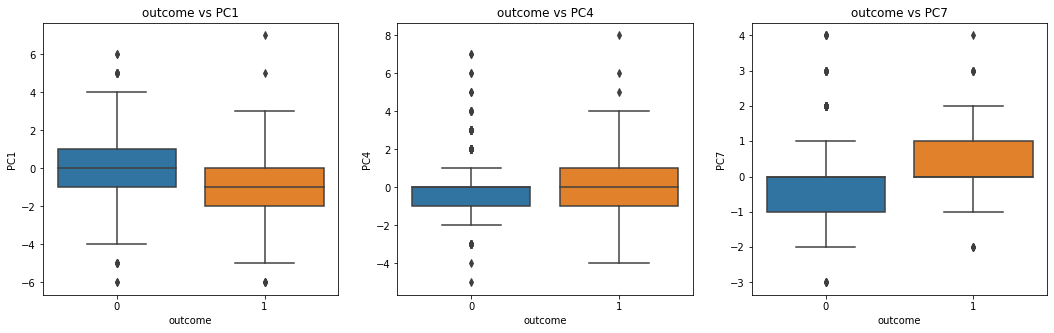

In [ ]:
#Plot to represent relationship of a few Principal components to outcome
import seaborn as sns

f, axes = plt.subplots(ncols=3, figsize=(18,5))

sns.boxplot(data=finalDF, x="outcome",y="PC1", ax=axes[0])
axes[0].set_title("outcome vs PC1")

sns.boxplot(data=finalDF, x="outcome",y="PC4", ax=axes[1])
axes[1].set_title("outcome vs PC4")

sns.boxplot(data=finalDF, x="outcome",y="PC7", ax=axes[2])
axes[2].set_title("outcome vs PC7");

In [ ]:
X = finalDF.drop(columns='outcome')
y = finalDF[['outcome']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [ ]:
print(X_train.shape, X_test.shape)

(823, 36) (354, 36)


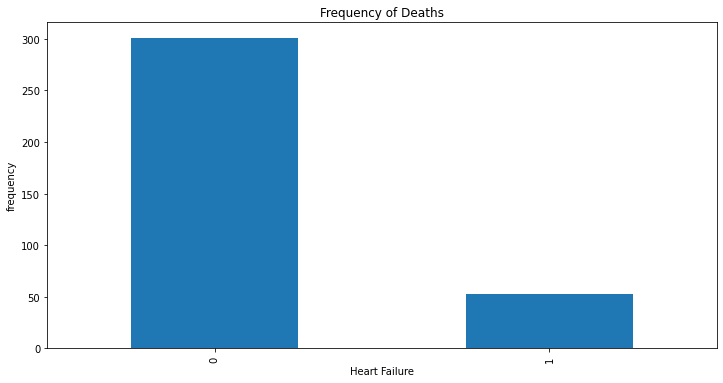

In [ ]:
#Plot to show imbalance in data
y_test['outcome'].value_counts().plot(kind='bar', title='Frequency of Deaths', xlabel='Heart Failure', ylabel='frequency')

In [ ]:
#Data set is imbalanced. Performing SMOTE to deal with this

from imblearn.over_sampling import SMOTE

Z = X.copy()
Y = y.copy()

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x_s, y_s = smote.fit_resample(Z, Y)
Z

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
0,-1,0,-3,0,1,-1,0,-1,0,0,0,0,0,0,-2,1,0,0,-1,0,0,0,2,0,0,1,0,0,0,0,0,0,-1,-1,0,0
1,2,0,-1,-1,0,0,4,0,0,0,0,0,-1,-1,-1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,-4,0,0,1,4,0,-1,0,0,-2,0,0,0,0,0,0,-2,0,0,0,0,1,-1,0,0,-1,0,0,1,0,-1,0,1,1
3,6,4,-1,0,1,0,2,0,2,-2,0,2,0,1,0,0,-1,0,0,0,0,2,0,1,1,-1,0,-1,-1,1,0,0,0,0,0,-1
4,0,0,-2,0,0,0,1,0,0,0,1,0,-1,-2,-1,1,0,1,0,0,0,0,-1,0,2,0,0,-1,-1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,-2,4,-3,2,-2,-2,0,0,0,-2,1,-2,0,0,1,0,0,-1,0,0,-2,0,0,0,0,0,-1,0,0,-1,0,0,1,0,0,0
1173,-2,1,0,1,0,0,0,1,-1,0,0,-2,-1,0,0,0,-1,-2,0,0,0,0,0,0,2,0,0,0,0,0,2,1,1,0,1,-1
1174,-2,0,-2,-1,2,0,-1,0,-1,0,1,0,0,0,1,0,1,0,0,0,0,0,-1,0,0,0,0,0,-1,-1,-1,0,0,0,0,0
1175,-1,0,0,0,0,0,0,1,0,0,-2,-3,-1,1,1,1,0,0,0,0,0,1,0,-1,0,1,0,-1,-1,0,0,0,0,-1,0,-1


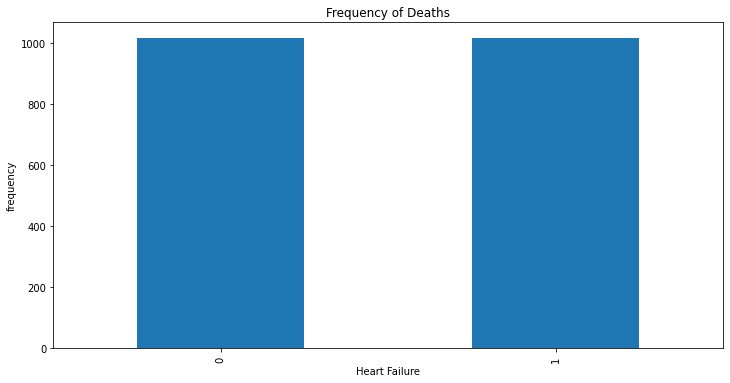

In [ ]:
#Plot to show balanced data post SMOTE
y_s['outcome'].value_counts().plot(kind='bar', title='Frequency of Deaths', xlabel='Heart Failure', ylabel='frequency')

In [ ]:
#Splitting Data set into test and train
X_train,X_test,y_train,y_test = train_test_split(x_s, y_s, test_size=0.3, random_state=123)

In [ ]:
#XGBClassifier Model
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=123, seed=123)
xgb.fit(X_train, y_train)

pred_b = xgb.predict(X_test)
y_test_array = np.array(y_test['outcome'])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Calculating Confusion Matrix, Classification report and Accuracy of XGBClassifier Model
import sklearn.metrics  as metrics
from sklearn.metrics import classification_report
xgb_accuracy = metrics.accuracy_score(pred_b, y_test_array)
con = confusion_matrix(pred_b, y_test_array)
xgb_con = classification_report(pred_b, y_test_array)

In [ ]:
#Confusion Matrix, Classification report and Accuracy of XGBClassifier Model
print("Confusion Matrix:", "\n", con, "\n")
print("Classification Report", "\n", xgb_con, "\n")
print("Accuracy of XGB Classifier Model is: ", xgb_accuracy)

Confusion Matrix: 
 [[258  34]
 [ 44 275]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       292
           1       0.89      0.86      0.88       319

    accuracy                           0.87       611
   macro avg       0.87      0.87      0.87       611
weighted avg       0.87      0.87      0.87       611
 

Accuracy of XGB Classifier Model is:  0.8723404255319149


Text(0.5, 1.0, 'ACCURACY SCORE')

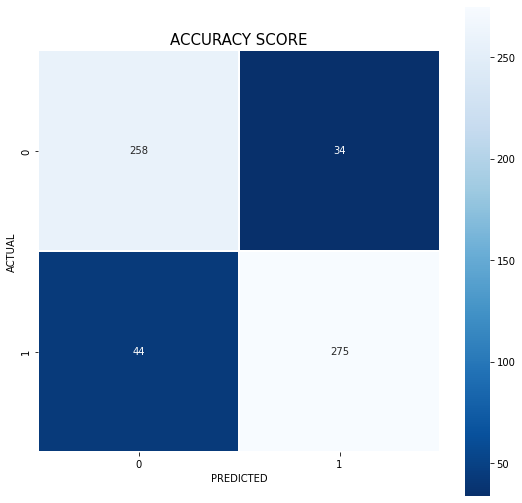

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(9,9))
sns.heatmap(con, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
all_sample_title = 'ACCURACY SCORE'.format(accuracy_score)
plt.title(all_sample_title, size = 15)

In [ ]:
#Logistic regression Model

from sklearn.linear_model import LogisticRegression
 
ml=LogisticRegression()
ml.fit(X_train, y_train)
print(ml.score(X_train, y_train))
print(ml.score(X_test, y_test))

0.7129824561403508
0.707037643207856


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Finding predicted value and comparing with actual
y_predictions = ml.predict(X_test)
y_test_array = np.array(y_test['outcome'])
y_predictions, y_test_array

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 

In [ ]:
#Calculating Confusion Matrix, Classification report and Accuracy of Logistic Regression Model
lcm=confusion_matrix(y_predictions, y_test_array)
lcr= classification_report(y_predictions, y_test_array)
Log_accuracy = metrics.f1_score(y_predictions, y_test_array)

In [ ]:
#Confusion Matrix, Classification report and Accuracy of Logistic Regression Model
from sklearn.metrics import classification_report
print("Confusion Matrix:", "\n", lcm, "\n")
print("Classification Report", "\n", lcr, "\n")
print("Accuracy of Logistic Regression Model is: ", Log_accuracy)

Confusion Matrix: 
 [[223 100]
 [ 79 209]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       323
           1       0.68      0.73      0.70       288

    accuracy                           0.71       611
   macro avg       0.71      0.71      0.71       611
weighted avg       0.71      0.71      0.71       611
 

Accuracy of Logistic Regression Model is:  0.7001675041876047


Text(0.5, 1.0, 'ACCURACY SCORE')

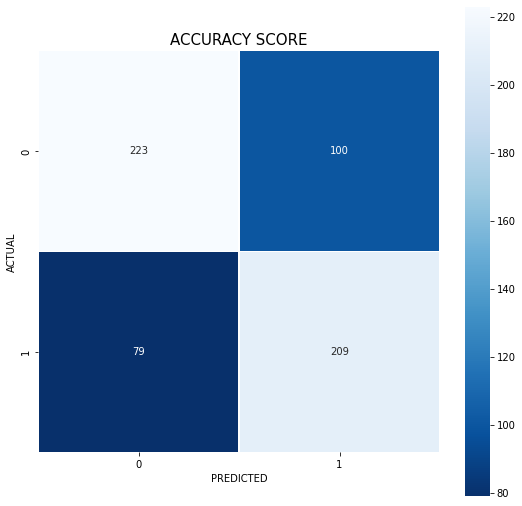

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(9,9))
sns.heatmap(lcm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
all_sample_title = 'ACCURACY SCORE'.format(accuracy_score)
plt.title(all_sample_title, size = 15)

In [ ]:
#KNeighborsClassifier Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.5628070175438596
0.5613747954173486


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Finding predicted value
y_predictions = knn.predict(X_test)
y_test_array = np.array(y_test['outcome'])
y_predictions, y_test_array

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
#Calculating Confusion Matrix, Classification report and Accuracy of KNeighborsClassifier Model
kcm=confusion_matrix(y_predictions, y_test_array)
Kcr= classification_report(y_predictions, y_test_array)
knn_accuracy = metrics.f1_score(y_predictions, y_test_array)

In [ ]:
#Confusion Matrix, Classification report and Accuracy of KNeighborsClassifier Model
from sklearn.metrics import classification_report
print("Confusion Matrix:", "\n", kcm, "\n")
print("Classification Report", "\n", Kcr, "\n")
print("Accuracy of KNeighbor Classifier Model is: ", knn_accuracy)

Confusion Matrix: 
 [[ 36   2]
 [266 307]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.12      0.95      0.21        38
           1       0.99      0.54      0.70       573

    accuracy                           0.56       611
   macro avg       0.56      0.74      0.45       611
weighted avg       0.94      0.56      0.67       611
 

Accuracy of KNeighbor Classifier Model is:  0.6961451247165533


Text(0.5, 1.0, 'ACCURACY SCORE')

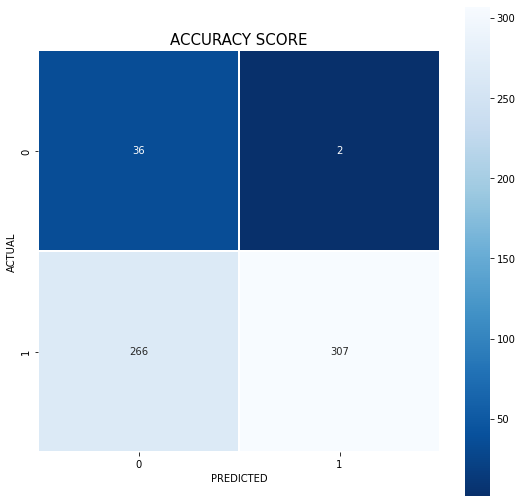

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(9,9))
sns.heatmap(kcm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
all_sample_title = 'ACCURACY SCORE'.format(accuracy_score)
plt.title(all_sample_title, size = 15)

In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9181669394435352

In [ ]:
#Finding predicted value
y_predictions = rf.predict(X_test)
y_test_array = np.array(y_test['outcome'])
y_predictions, y_test_array

(array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 

In [ ]:
#Calculating Confusion Matrix, Classification report and Accuracy of Random Forest Model
rf=confusion_matrix(y_predictions, y_test_array)
rcr= classification_report(y_predictions, y_test_array)
rf_accuracy = metrics.f1_score(y_predictions, y_test_array)

In [ ]:
#Confusion Matrix, Classification report and Accuracy of Random Forest Model
from sklearn.metrics import classification_report
print("Confusion Matrix:", "\n", rf, "\n")
print("Classification Report", "\n", rcr, "\n")
print("Accuracy of Random Forest Model is: ", rf_accuracy)

Confusion Matrix: 
 [[273  21]
 [ 29 288]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       294
           1       0.93      0.91      0.92       317

    accuracy                           0.92       611
   macro avg       0.92      0.92      0.92       611
weighted avg       0.92      0.92      0.92       611
 

Accuracy of Random Forest Model is:  0.9201277955271565


Text(0.5, 1.0, 'ACCURACY SCORE')

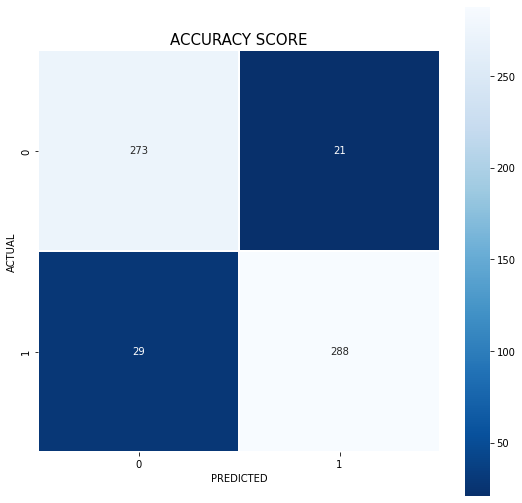

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(9,9))
sns.heatmap(rf, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
all_sample_title = 'ACCURACY SCORE'.format(accuracy_score)
plt.title(all_sample_title, size = 15)

In [ ]:
#Consolidated Accuracy of all the Model used
print("Accuracy of Models:", "\n")
print("Accuracy of Logistic Regression Model is:", Log_accuracy)
print("Accuracy of KNeighbors Classifier Model is:", knn_accuracy)
print("Accuracy of Random Forest Classifier Model is:", rf_accuracy)
print("Accuracy of XG Boost Classifier Model is:", xgb_accuracy)


Accuracy of Models: 

Accuracy of Logistic Regression Model is: 0.7001675041876047
Accuracy of KNeighbors Classifier Model is: 0.6961451247165533
Accuracy of Random Forest Classifier Model is: 0.9201277955271565
Accuracy of XG Boost Classifier Model is: 0.8723404255319149


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LR: 0.692236 (0.036702)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RF: 0.877316 (0.031578)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KNN: 0.720033 (0.038157)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

XGBoost: 0.857151 (0.032815)


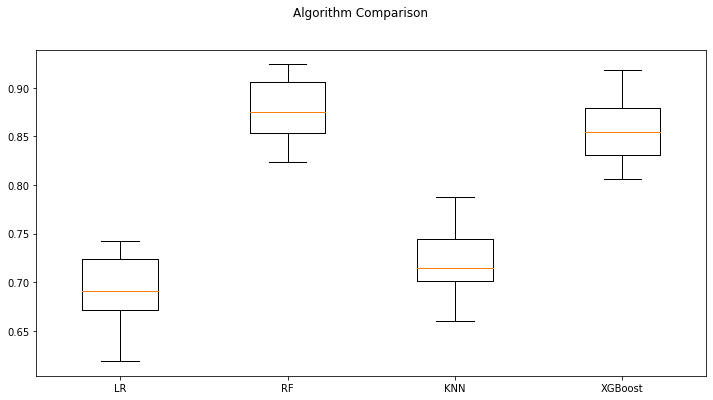

In [ ]:
#Comparing all models using a plot
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=None)


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
         kfold = model_selection.KFold(n_splits=10, random_state=None)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()